In [3]:
import h5py as h5
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# Working with H5 files from your imager

The below just opens the file and prints the names and lengths of each object. Apparently, most of it is empty arrays, but you can tell if they have data if their lengths are not zero

In [5]:
#filename = "../data/230320 particle dilution to match brightness.h5"

filename = "/Users/allisondennis/Library/CloudStorage/OneDrive-NortheasternUniversity/AMD/IR VIVO data/240329_ExposureTimeTest2/ExposureTimeTest2_1_12_6.h5"

# open the h5 file
h5_file = h5.File(filename, 'r')

# print the keys
print(h5_file.keys())

# print the shape of the data
print(h5_file['Cube'].keys())

# Looks like everything is in the "Cube" group -- let's look at the names and lengths of the datasets
h5_file['Cube'].visititems(lambda x, obj: print(x, len(obj)))

<KeysViewHDF5 ['Cube']>
<KeysViewHDF5 ['Angle', 'Display', 'GratingID', 'Images', 'Info', 'TimeExposure', 'Timestamp', 'Wavelength']>
Angle 1
Display 1
Display/IntensityScale 0
GratingID 1
Images 1
Info 6
Info/Camera 2
Info/Camera/DynamicProperties 1
Info/Camera/DynamicProperties/Output 0
Info/Camera/ManufacturerFlatField 2
Info/Camera/ManufacturerFlatField/HighGain 1
Info/Camera/ManufacturerFlatField/HighGain/CameraParameters 0
Info/Camera/ManufacturerFlatField/LowGain 1
Info/Camera/ManufacturerFlatField/LowGain/CameraParameters 0
Info/Cube 1
Info/Cube/ZAxis 0
Info/Grating 17
Info/Grating/0 2
Info/Grating/0/Calibration 0
Info/Grating/0/Registration 6
Info/Grating/0/Registration/1 mouse Macro - 75x60mm 0
Info/Grating/0/Registration/1 mouse Wide - 80x64mm 0
Info/Grating/0/Registration/2 mice - 100x80mm 0
Info/Grating/0/Registration/3 mice - 156x125mm 0
Info/Grating/0/Registration/Macro view - 63x50mm 0
Info/Grating/0/Registration/Super Macro view - 50x40mm 0
Info/Grating/1 2
Info/Gratin

## Printing some output
The above cell shows all the groups in the H5 file. You can directly query into them like this:

In [6]:
print("TimeExposure: ", h5_file['Cube']['TimeExposure'][0:10])
print("Wavelength: ", h5_file['Cube']['Wavelength'][0:10])
print("Translation_X: ", h5_file['Cube']['Translation_X'][0:5])
print("Translation_Y: ", h5_file['Cube']['Translation_Y'][0:5])
print("Grating", h5_file['Cube']['GratingID'][0:10])


TimeExposure:  [0.0064]
Wavelength:  [1150.]


KeyError: "Unable to open object (object 'Translation_X' doesn't exist)"

In [12]:
img_data = h5_file['Cube']['Images']
wavelengths = h5_file['Cube']['Wavelength']
print("Shape of the image data is: ", img_data.shape)
print(type(img_data[()].dtype))

Shape of the image data is:  (1, 640, 512)
<class 'numpy.dtypes.UInt16DType'>


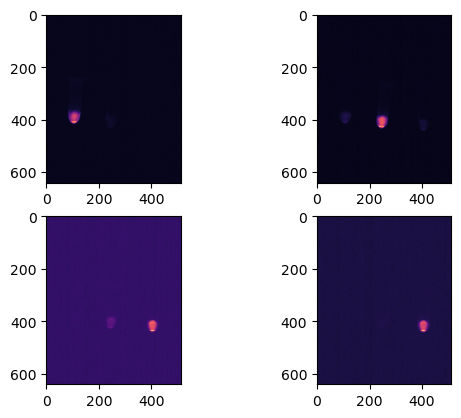

In [129]:
# Pick a wavelegnth index
sfig, ax = plt.subplots(2,2)
ax[0][0].imshow(img_data[50, :,:], cmap='magma')
ax[0][1].imshow(img_data[150,:,:], cmap='magma')
ax[1][0].imshow(img_data[200,:,:], cmap='magma')
ax[1][1].imshow(img_data[300,:,:], cmap='magma')

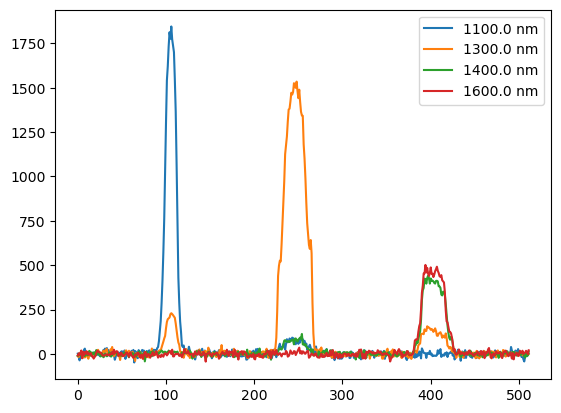

In [128]:
# Make some plots of the intensities across the image
sfig, ax = plt.subplots(1,1)
y_pos = 410
x_pixels = np.arange(512)
for wl_idx in [50, 150, 200, 300]:
    ax.plot(x_pixels, img_data[wl_idx, y_pos, :], label=f"{wavelengths[wl_idx]} nm")

ax.legend()

(351, 640, 512)


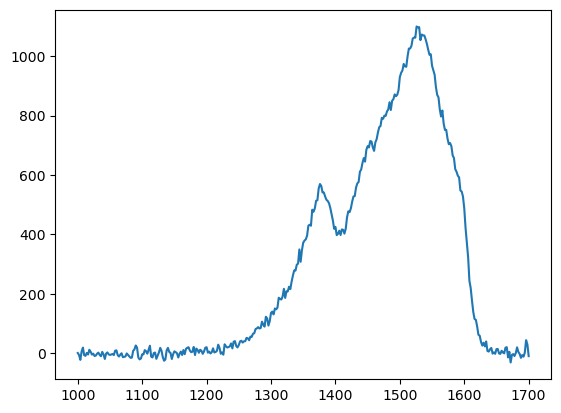

In [143]:
# Here is how to cast the image data into a numpy array
np_image_data = np.array(img_data)
print(np_image_data.shape)
type(np_image_data)

plt.plot(np.array(wavelengths), np_image_data[:,410,400])

## Processing with xarray

You can ignore this part if the above is sufficient.

In [73]:
ds = xr.open_dataset(filename, engine='h5netcdf', group="Cube", phony_dims="sort")
ds

<xarray.Dataset>
Dimensions:        (phony_dim_0: 351, phony_dim_1: 640, phony_dim_2: 512)
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2
Data variables:
    GratingID      (phony_dim_0) int32 ...
    Images         (phony_dim_0, phony_dim_1, phony_dim_2) float32 ...
    TimeExposure   (phony_dim_0) float64 ...
    Translation_X  (phony_dim_0) float64 ...
    Translation_Y  (phony_dim_0) float64 ...
    Wavelength     (phony_dim_0) float64 ...

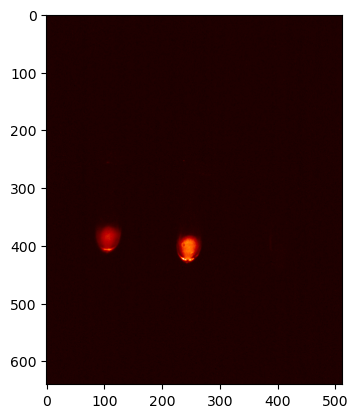

In [144]:
# Use the black to red color map
plt.imshow(ds.Images.data[100,:,:], cmap='gist_heat')